# Import Libraries

In [104]:
# Python Structs Type using for Wide Variety Mathematical Operations Like Arrays
import numpy as np 

# Working with the DataFrame
import pandas as pd

#Dealing With Warnings
import warnings

#from sklearn import preprocessing

In [105]:
# Importing the Model_SVM libarys

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [106]:
#Store the data into the variable df

df = pd.read_csv('Bit_AfterClean.csv')

#Do not show warnings
warnings.filterwarnings("ignore")

In [107]:
#A variable for predicting 'n' days out into the future
prediction_days = 30 #n = 30 days

#Create another column (the target or dependent variable)
df['PREDICTION'] = df[['CLOSE']].shift(-prediction_days)

In [108]:
df.drop(['Unnamed: 0'], 1, inplace=True)

In [109]:
df3 = df.copy()

In [110]:
df = df.drop(["CLOSE"], axis =1)

In [111]:
#CREATE THE INDEPENDENT DATA SET (X)

# Convert the dataframe to a numpy array and drop the prediction column
X = np.array(df.drop(['PREDICTION'],1))

#Remove the last 'n' rows where 'n' is the prediction_days
X= X[:len(df)-prediction_days]

In [112]:
#CREATE THE DEPENDENT DATA SET (y) 
# Convert the dataframe to a numpy array (All of the values including the NaN's) y = np.array(df['Prediction'])  
# Get all of the y values except the last 'n' rows 
y = np.array(df['PREDICTION']) 
y = y[:-prediction_days] 

# Prepring X,y

In [113]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set prediction_days_array equal to the last 30 rows of the original data set from the price column
prediction_days_array = np.array(df.drop(['PREDICTION'],1))[:prediction_days]

# Creating and train the Support Vector Models 

In [114]:
# Best Params To SVR_Models
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
Cs = [100,1000,10000]
gammas = [1e-07,1e-06,1e-05]
param_grid = {'gamma' : gammas, 'C': Cs}
grid_search = GridSearchCV(svm.SVR(), param_grid, cv=5)
grid_search.fit(X, y)
grid_search.best_params_
print(grid_search.best_params_)

{'C': 10000, 'gamma': 1e-07}


In [115]:
# Create and train the Support Vector Machine 
svr_rbf = SVR(C=10000, gamma= 1e-07)#Create the model
svr_rbf.fit(x_train, y_train) #Train the model

SVR(C=10000, gamma=1e-07)

# Predict's Results

In [116]:
# Testing Model: Score returns the accuracy of the prediction. 
# The best possible score is 1.0
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.9012192432612607


In [117]:
# Print the model predictions for the next 'n=30' days
svm_prediction = svr_rbf.predict(prediction_days_array)

In [118]:
svm_prediction

array([43558.08650225, 56109.11189712, 56144.66688398, 56448.89981849,
       56237.16606011, 37349.16396395, 39078.67156853, 41494.68535556,
       33422.64940772, 39458.07088385, 34993.92495428, 36443.4337987 ,
       42901.60941517, 42640.71341146, 40662.61915931, 41692.01587346,
       41287.65648921, 39531.97686739, 44317.43679305, 54440.94821859,
       54815.36048683, 45281.68581972, 41679.5336148 , 41606.79485877,
       58808.61577813, 58519.95758024, 57031.11703655, 56176.29804541,
       46098.32134972, 51196.2604324 ])

Text(0, 0.5, '$ Close')

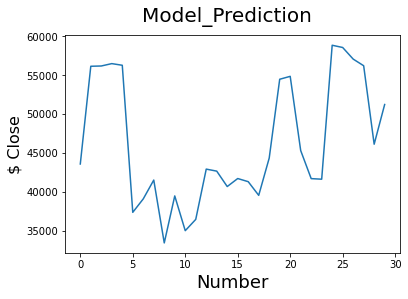

In [119]:
# Plot for the next 'n=30' days
import matplotlib.pyplot as plt
plt.plot(svm_prediction)
plt.suptitle('Model_Prediction', fontsize=20)  
plt.xlabel('Number', fontsize=18)                     
plt.ylabel('$ Close', fontsize=16)   

Text(0, 0.5, '$ Price')

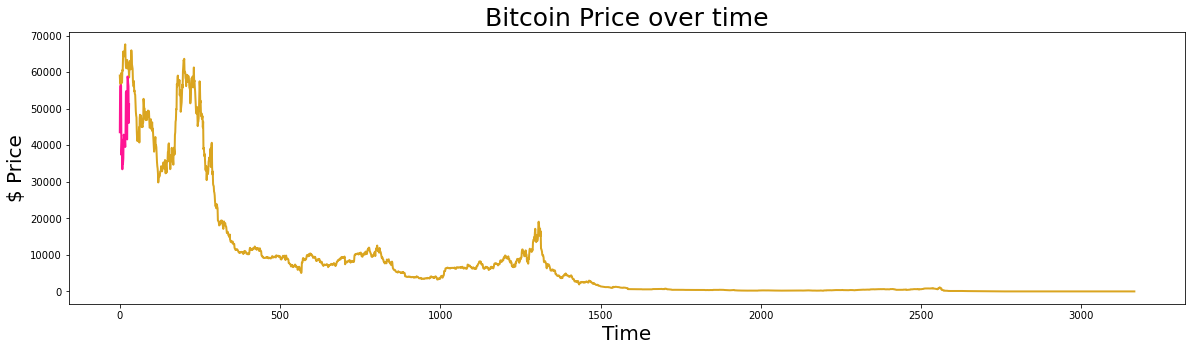

In [120]:
# Will Demonstate the Dates 
time =[]
for i in range(3166):
    time.append(i)

#Time-line Plots
plt.figure(figsize = (20, 5))
plt.plot(time, df3["CLOSE"][30:], color='goldenrod', lw=2)
plt.plot(time[:30], svm_prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)